In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from helper.model import ReactionDiffusionModel


In [2]:
def initialize_grid(N):
    U = np.ones((N, N))
    V = np.zeros((N, N))

    r = 10
    center = N // 2
    U[center-r:center+r, center-r:center+r] = 0.5
    V[center-r:center+r, center-r:center+r] = 0.25

    return U, V


In [3]:
N = 100
U, V = initialize_grid(N)
Du = 0.1
Dv = 0.1
F = 0.05
k = 0.05
dt = 1

N_steps = 5000

In [5]:
def print_grid(V, Du, Dv, F, k):
    plt.figure(figsize=(12, 4))

    plt.imshow(V, cmap="inferno")
    plt.title(f"Du={Du}, Dv={Dv}, F={F}, k={k}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

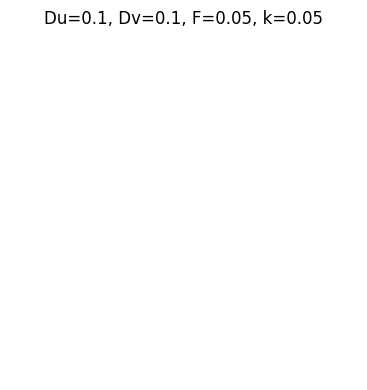

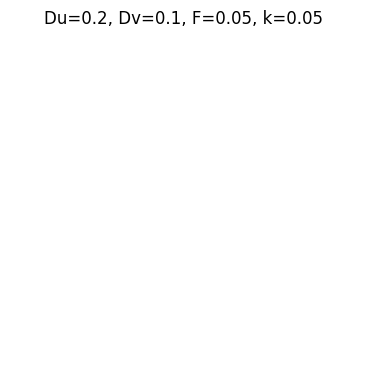

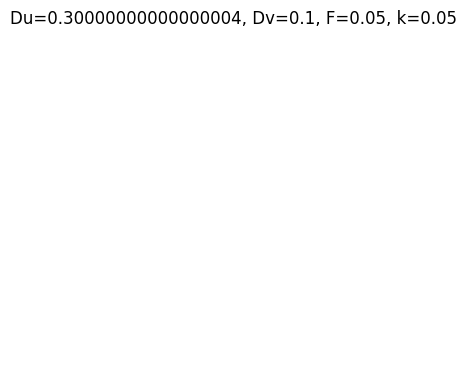

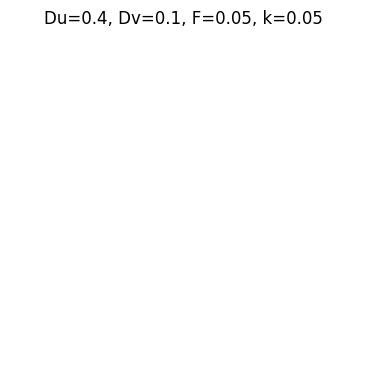

In [10]:
change_D = np.arange(0.1, 0.5, 0.1)

for du in change_D:
    model = ReactionDiffusionModel(N, N, U.copy(), V.copy(), du, Dv, F, k, dt)
    
    for _ in range(N_steps):
        model.update_grid()
        
    _, Z = model.get_grid()
    print_grid(Z, du, Dv, F, k)

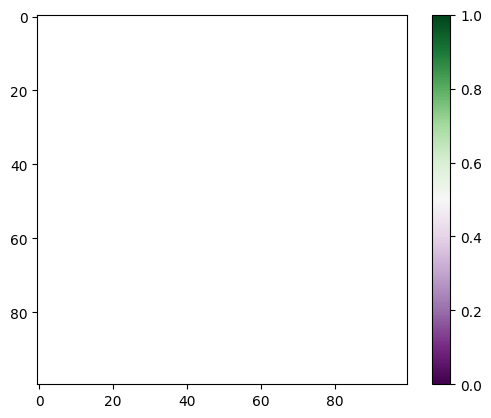

In [7]:
U, V = model.get_grid()

fig = plt.figure()
im = plt.imshow(V, interpolation='none', cmap='PRGn', vmin=0, vmax=1)
fig.colorbar(im)


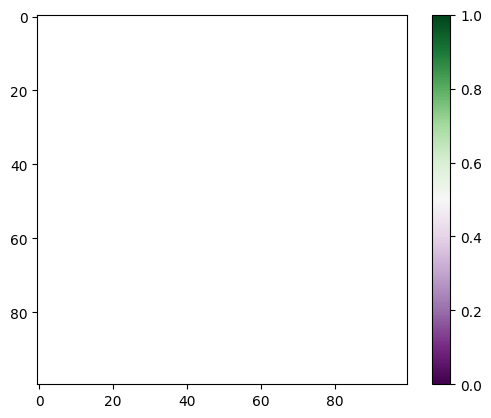

In [8]:
for i in range(10):
    model.update_grid()
    
U, V = model.get_grid()
fig = plt.figure()
im = plt.imshow(V, interpolation='none', cmap='PRGn', vmin=0, vmax=1)
fig.colorbar(im)

In [9]:
print(V)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
